# UMAP Explorer

This notebook acts as an exmaple of a UMAP exploration work flow

- Load data (this example uses a csv file)
- Generate data columns
- Embed the UMAP and plot the new xy-coordinates
- Generate clusters using the default Leiden algo
- Plot the UMAP again this time coloring on the clusters
- Generate a xgboost regression model selecting 2 clusters


In [1]:
import explorer as ue

import numpy as np
import pandas as pd

/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ben/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [2]:
explore = ue.UE()

In [3]:
explore.load_data('../image_umap.csv',filetype='csv')

In [4]:
explore.get_data_columns(print_cols=False, extra=["x", "y","Conc uM"])

In [5]:
explore.embed()

/home/ben/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


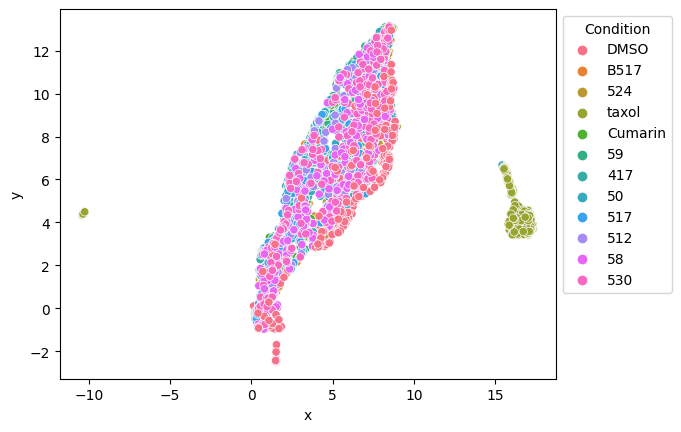

In [6]:
explore.plot(color_on='Condition')

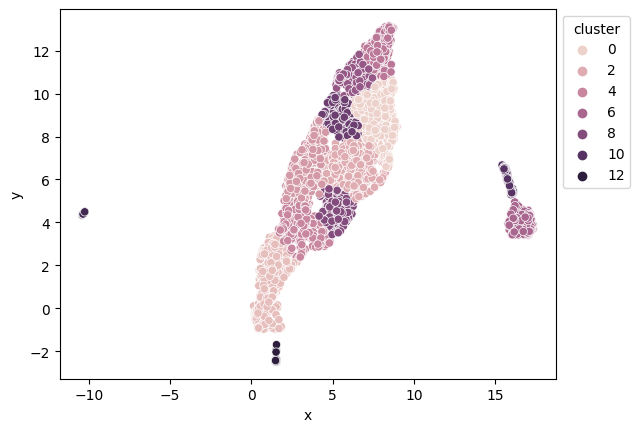

In [7]:
explore.cluster()
explore.plot(color_on='cluster')

In [8]:
print(explore.cluster_labels)
explore.gen_model([7,9], [0,1,2,3,4,5,6,8,10,11])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


/hdd/tools/UMAP-Explorer/explorer/umap_explorer.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['label'] = 0.0


Model R2 Score: 0.78
Model MSE: 0.02


In [9]:
explore.gen_model(7,9)

/hdd/tools/UMAP-Explorer/explorer/umap_explorer.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['label'] = 0.0


Model R2 Score: 0.71
Model MSE: 0.07


In [10]:
explore.gen_model([7,9], 'rest')

Model R2 Score: 0.81
Model MSE: 0.02
